In [42]:
#Below progream utilities to generate data for Customer Delivery Time/Days Prediction
#import random
#Create 1000 random Sold To customers 
#for i in range(1000):
    #print (random.randint(1010000001,1030000000))


In [43]:
#Create 1000 random Ship To customers 
#for i in range(1000):
    #print (random.randint(2010000001,2030000000))

In [44]:
#Generate 100 random material numbers
#for i in range(100):
    #print (random.randint(40321003001,40331003000))

In [45]:
#Generate 100 random qty
#for i in range(100):
    #print (random.randint(1,100))

In [46]:
#Generate random Price per qty
#for i in range(100):
    #print (random.randint(1, 1500))

In [47]:
#Create Random requested delivery dates

#import random 
#from datetime import date, timedelta

#start_date = date(2021, 3, 1)

#for i in range(1000): 
    #rand_num_days = random.randint(1, 5) 
    #day = start_date + timedelta(days=rand_num_days) 
    #print(day)

In [48]:
#Create Random delivery dates
#import random 
#from datetime import date, timedelta

#start_date = date(2021, 3, 7)

#for i in range(1000): 
    #rand_num_days = random.randint(1, 5) 
    #day = start_date + timedelta(days=rand_num_days) 
    #print(day)

In [49]:
#Load all required libraries here
import os
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [50]:

#Function to download and read delivery days CSV file
DATA_FILES_PATH = r"xxxxx"
def load_customer_data(data_path=DATA_FILES_PATH):
    csv_path = os.path.join(data_path, "delivery_days.csv")
    return pd.read_csv(csv_path)


In [51]:
dely_days_data = load_customer_data()
dely_days_data.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD),customer_req_date,delivery_date,no_of_delivery_days
0,1019733606,2020999825,40321040322,676,96,64896,3/4/2021,3/12/2021,8
1,1018240245,2011020734,40329968668,412,92,37904,3/3/2021,3/12/2021,9
2,1013606125,2021012587,40325529556,533,41,21853,3/4/2021,3/12/2021,8
3,1026160794,2018327772,40326638721,188,19,3572,3/3/2021,3/9/2021,6
4,1019775063,2012844064,40324755545,720,60,43200,3/5/2021,3/8/2021,3


In [52]:
#Check what are types of data, any null values etc
dely_days_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sold To              1000 non-null   int64 
 1   Ship To              1000 non-null   int64 
 2   Material             1000 non-null   int64 
 3   Price/Qty (USD)      1000 non-null   int64 
 4   Qty                  1000 non-null   int64 
 5   Total Price (USD)    1000 non-null   int64 
 6   customer_req_date    1000 non-null   object
 7   delivery_date        1000 non-null   object
 8   no_of_delivery_days  1000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 70.4+ KB


In [53]:
#Check count, mean, min, max etc for given file
dely_days_data.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD),no_of_delivery_days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1020197436.905000,2019884464.543000,40325922569.290001,749.950000,52.960000,39472.490000,5.944000
std,5787611.235765,5768255.739632,2737373.482433,429.822772,28.118126,31762.091626,2.061823
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000,2.000000
25%,1015332674.000000,2014710171.750000,40323524207.000000,351.500000,30.750000,11106.500000,4.000000
50%,1020311913.500000,2019947613.500000,40325998357.500000,751.500000,55.000000,31244.500000,6.000000
75%,1025122356.000000,2024810432.500000,40328159357.750000,1137.500000,76.500000,64362.750000,7.000000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000,10.000000


array([[<AxesSubplot:title={'center':'Sold To'}>,
        <AxesSubplot:title={'center':'Ship To'}>,
        <AxesSubplot:title={'center':'Material'}>],
       [<AxesSubplot:title={'center':'Price/Qty (USD)'}>,
        <AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Total Price (USD)'}>],
       [<AxesSubplot:title={'center':'no_of_delivery_days'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

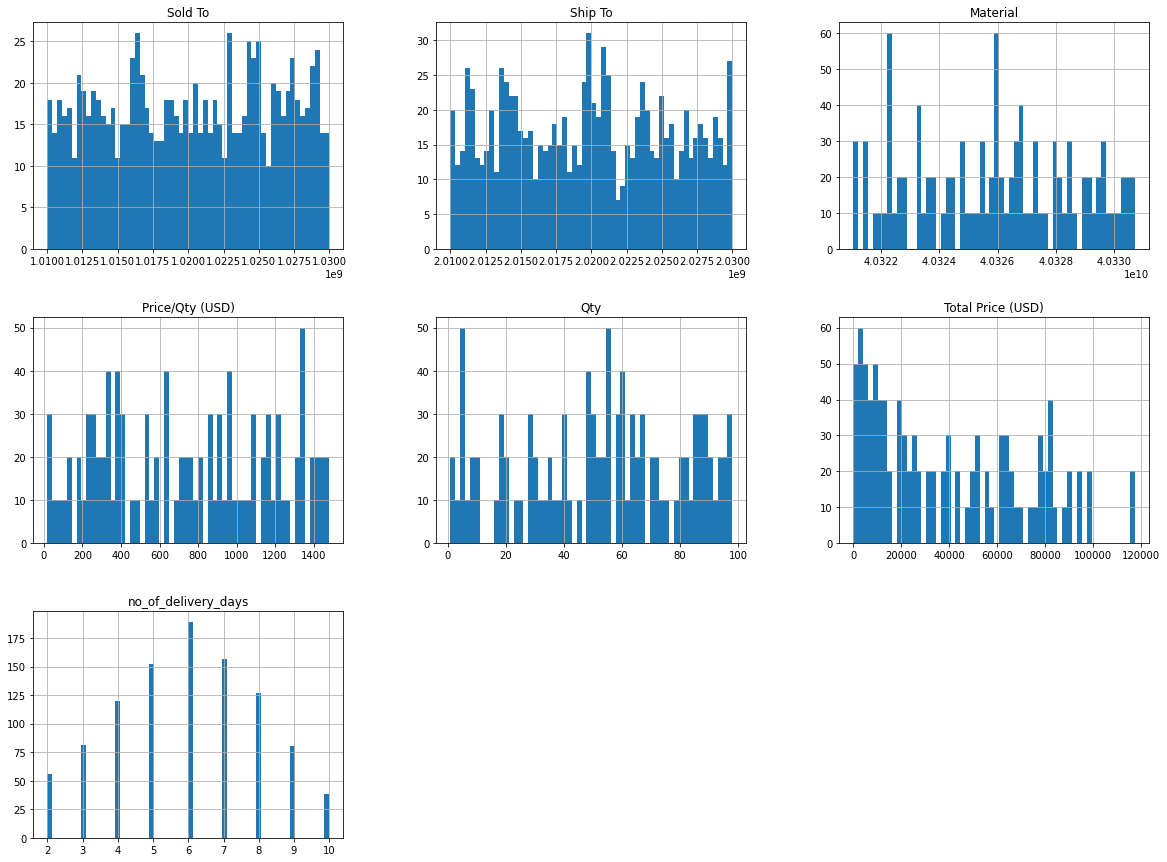

In [54]:
#Quick Histogram to view the data of those all 6 colums Sold To, Ship To, Material, Price/Qty, Qty and Total Price
%matplotlib inline
import matplotlib.pyplot as plt
dely_days_data.hist(bins=58, figsize=(20,15))

In [55]:
#Use Scikit-Learn train_test_split function to split the data for us
train_delivery_days, test_delivery_days = train_test_split(dely_days_data, test_size=0.2, random_state=42)
len(train_delivery_days)

800

In [56]:
len(test_delivery_days)

200

In [57]:
train_delivery_days.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD),customer_req_date,delivery_date,no_of_delivery_days
29,1027565334,2025511779,40326545666,933,1,933,3/2/2021,3/8/2021,6
535,1021047754,2019111576,40328556698,968,87,84216,3/6/2021,3/9/2021,3
695,1019956946,2016870757,40323287609,629,2,1258,3/2/2021,3/10/2021,8
557,1018915017,2024118077,40323691890,141,30,4230,3/3/2021,3/8/2021,5
836,1029006489,2014551279,40327963841,589,58,34162,3/3/2021,3/12/2021,9


In [58]:
test_delivery_days.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD),customer_req_date,delivery_date,no_of_delivery_days
521,1016427172,2013772194,40326018182,965,26,25090,3/5/2021,3/8/2021,3
737,1012756339,2019364089,40321945132,80,24,1920,3/3/2021,3/12/2021,9
740,1026113399,2011416676,40326745519,27,58,1566,3/2/2021,3/8/2021,6
660,1019990794,2019200113,40328152382,1332,48,63936,3/2/2021,3/9/2021,7
411,1024313810,2029383800,40322838435,1323,9,11907,3/6/2021,3/10/2021,4


In [59]:
#Let's take Train Delivery Days data and work on this.

train_delivery_days.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD),no_of_delivery_days
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1020318680.218750,2019919872.960000,40325940023.787498,741.868750,53.177500,39045.485000,5.920000
std,5744213.314754,5730517.821724,2715757.408056,429.190785,28.454887,31580.980118,2.043605
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000,2.000000
25%,1015514711.250000,2014777575.000000,40323560165.000000,344.000000,30.000000,10235.000000,4.000000
50%,1020490620.500000,2019990026.500000,40325996917.000000,744.000000,55.000000,31101.000000,6.000000
75%,1025195015.000000,2024580885.750000,40328180285.000000,1107.750000,78.500000,64896.000000,7.000000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000,10.000000


In [60]:
train_delivery_days.columns

Index(['Sold To', 'Ship To', 'Material', 'Price/Qty (USD)', 'Qty',
       'Total Price (USD)', 'customer_req_date', 'delivery_date',
       'no_of_delivery_days'],
      dtype='object')

array([[<AxesSubplot:xlabel='Sold To', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Material', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Price/Qty (USD)', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Qty', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Total Price (USD)', ylabel='Sold To'>,
        <AxesSubplot:xlabel='no_of_delivery_days', ylabel='Sold To'>],
       [<AxesSubplot:xlabel='Sold To', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Material', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Price/Qty (USD)', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Qty', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Total Price (USD)', ylabel='Ship To'>,
        <AxesSubplot:xlabel='no_of_delivery_days', ylabel='Ship To'>],
       [<AxesSubplot:xlabel='Sold To', ylabel='Material'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Material'>,
        <AxesS

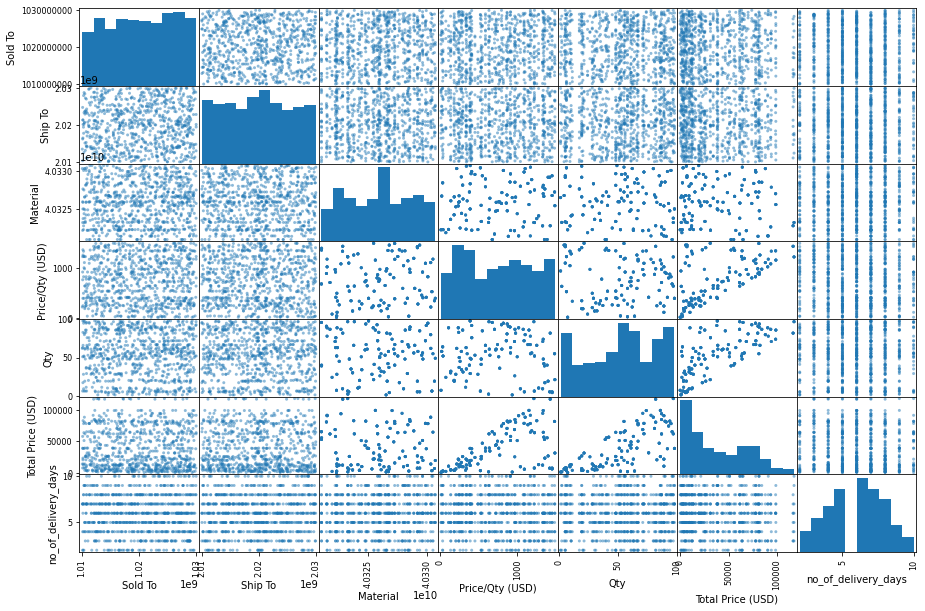

In [61]:
#Let's check Correlation in graphical way using pandas scatter matrix
attributes = ["Sold To", "Ship To", "Material", "Price/Qty (USD)", "Qty", "Total Price (USD)", 'no_of_delivery_days']
scatter_matrix(train_delivery_days[attributes], figsize=(15,10))

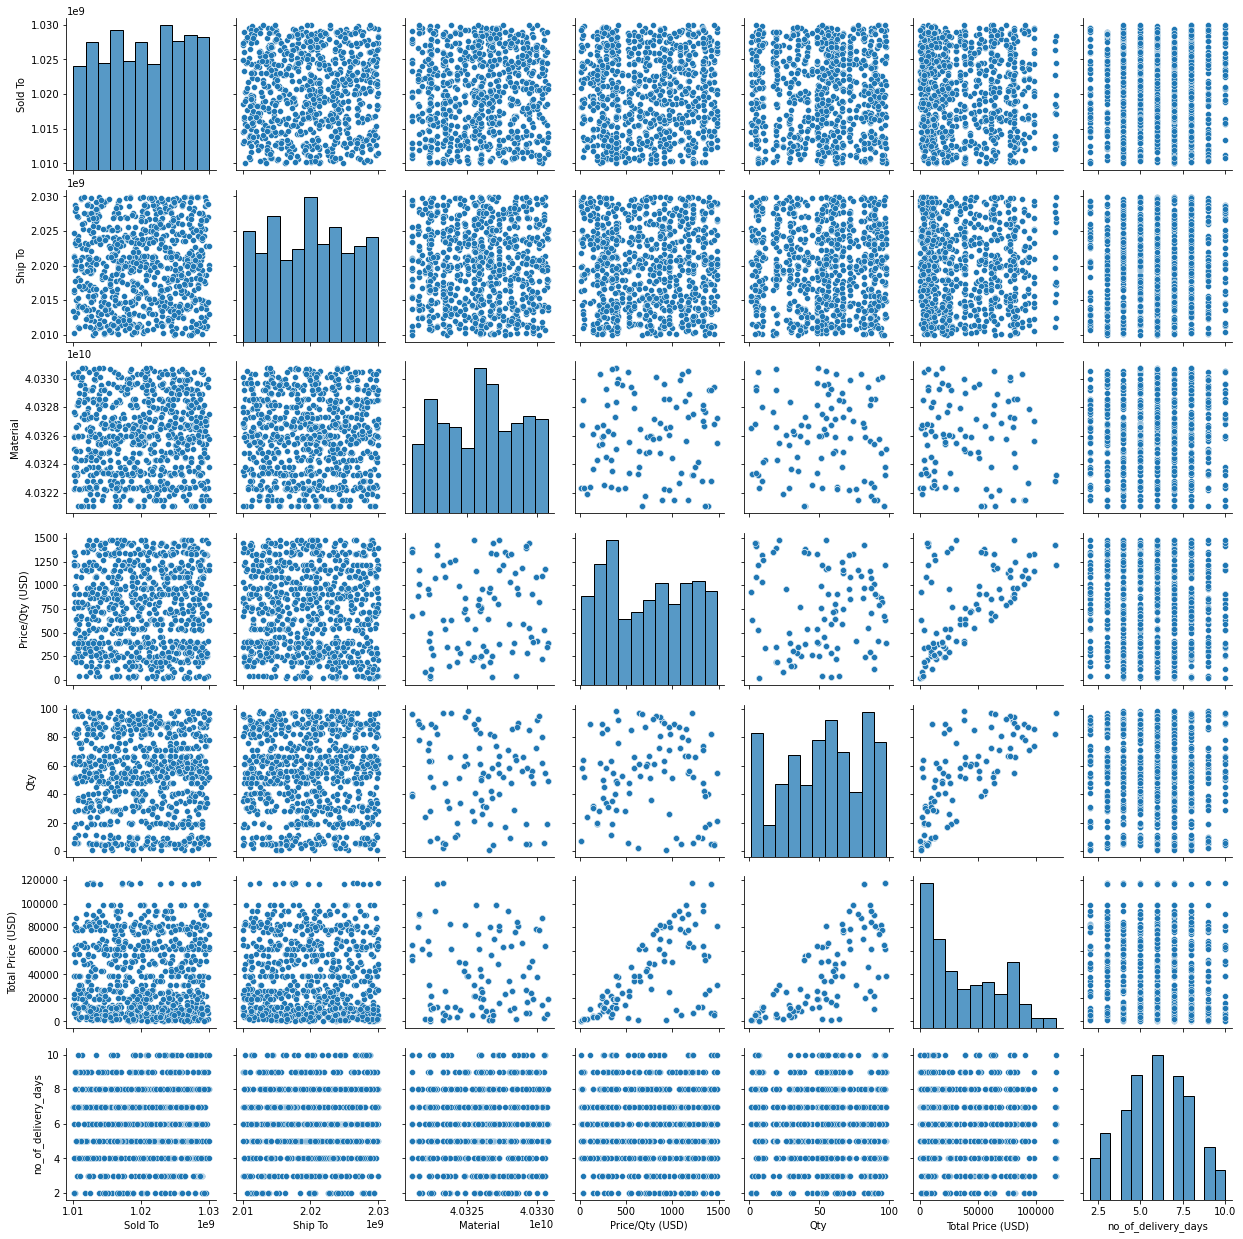

In [62]:
#Let's check in Seaborn Pairplot library as you can see same like above
import seaborn as sns
sns.pairplot(train_delivery_days)

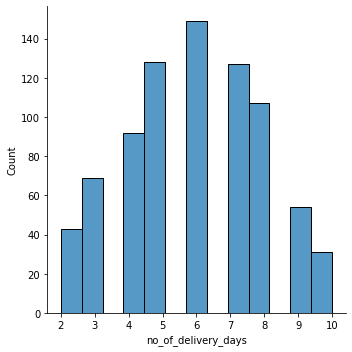

In [63]:
#let's check in Seaborn plot of "no of delivery days" as it shows more delivery days falls on 6 days
sns.displot(train_delivery_days['no_of_delivery_days'])

<AxesSubplot:>

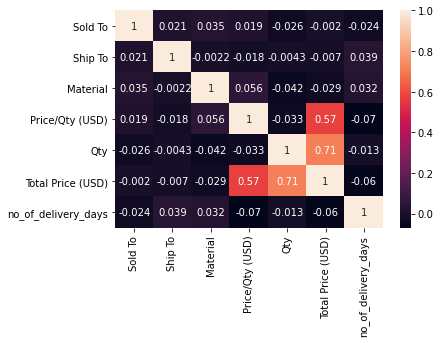

In [64]:
#Correlation of each field in Seaborn Heatmap and Seaborn is more useful to view one more correlated
sns.heatmap(train_delivery_days.corr(), annot=True)

In [65]:
#Copy all data except customer_req_date, delivery_date (no need of dates to predict here) and no_of_delivery_days into train_delivery_days_X 
train_delivery_days_X = train_delivery_days[['Sold To', 'Ship To', 'Material', 'Price/Qty (USD)', 'Qty',
       'Total Price (USD)']]
train_delivery_days_X.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
29,1027565334,2025511779,40326545666,933,1,933
535,1021047754,2019111576,40328556698,968,87,84216
695,1019956946,2016870757,40323287609,629,2,1258
557,1018915017,2024118077,40323691890,141,30,4230
836,1029006489,2014551279,40327963841,589,58,34162


In [66]:
#Let's check again count, mean, std, min etc for all columns except customer_req_date, delivery_date and no_of_delivery_days
train_delivery_days_X.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1020318680.218750,2019919872.960000,40325940023.787498,741.868750,53.177500,39045.485000
std,5744213.314754,5730517.821724,2715757.408056,429.190785,28.454887,31580.980118
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000
25%,1015514711.250000,2014777575.000000,40323560165.000000,344.000000,30.000000,10235.000000
50%,1020490620.500000,2019990026.500000,40325996917.000000,744.000000,55.000000,31101.000000
75%,1025195015.000000,2024580885.750000,40328180285.000000,1107.750000,78.500000,64896.000000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000


In [67]:
#Copy no_of_delivery_days into train_delivery_days_y to check actual values later with predicted values
train_delivery_days_y = train_delivery_days['no_of_delivery_days'].copy()
train_delivery_days_y.head()

29     6
535    3
695    8
557    5
836    9
Name: no_of_delivery_days, dtype: int64

In [68]:
#Let's check again count, mean, std, min etc for no of delivery days column
train_delivery_days_y.describe()

count   800.000000
mean      5.920000
std       2.043605
min       2.000000
25%       4.000000
50%       6.000000
75%       7.000000
max      10.000000
Name: no_of_delivery_days, dtype: float64

In [69]:
#Apply feature scaling using Pipeline as we have only numerical attributes that have different values in each column,
# so we need to do min-max scaling and standarization of data.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

delivery_data_pipeline = Pipeline([('std_scaler', StandardScaler())])

delivery_data_pipeline_tr = delivery_data_pipeline.fit_transform(train_delivery_days_X)
delivery_data_pipeline_tr

array([[ 1.26234643,  0.9764221 ,  0.22314994,  0.44560793, -1.83483918,
        -1.20757264],
       [ 0.12700257, -0.14113953,  0.96411821,  0.52720777,  1.18937949,
         1.43120235],
       [-0.06301307, -0.53241671, -0.97728689, -0.26314488, -1.79967385,
        -1.1972752 ],
       ...,
       [ 1.23018703,  1.18247717,  0.81514727,  1.37584601, -0.18206851,
         0.78864196],
       [-1.14424485, -1.45886269,  0.96411821,  0.52720777,  1.18937949,
         1.43120235],
       [-0.97055635, -0.566122  , -0.15123758, -0.48696156, -0.42822585,
        -0.54473421]])

In [70]:
from sklearn.compose import ColumnTransformer

delivery_data_attributes = list(train_delivery_days_X)

delivery_full_pipeline = ColumnTransformer([
    ("num", delivery_data_pipeline, delivery_data_attributes)
])

delivery_train_data_prepared = delivery_full_pipeline.fit_transform(train_delivery_days_X)
delivery_train_data_prepared

array([[ 1.26234643,  0.9764221 ,  0.22314994,  0.44560793, -1.83483918,
        -1.20757264],
       [ 0.12700257, -0.14113953,  0.96411821,  0.52720777,  1.18937949,
         1.43120235],
       [-0.06301307, -0.53241671, -0.97728689, -0.26314488, -1.79967385,
        -1.1972752 ],
       ...,
       [ 1.23018703,  1.18247717,  0.81514727,  1.37584601, -0.18206851,
         0.78864196],
       [-1.14424485, -1.45886269,  0.96411821,  0.52720777,  1.18937949,
         1.43120235],
       [-0.97055635, -0.566122  , -0.15123758, -0.48696156, -0.42822585,
        -0.54473421]])

In [71]:
#Write a small function to check Scores, Mean and Standard Deviation for Scikit Linear Regression

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [72]:
#We have done all now, Let's check the Scikit Linear Regression model to see how it performs and predicts in delivery days
#Fit delivery days X (data prepared) and Y of no_of_delivery days

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(delivery_train_data_prepared, train_delivery_days_y)

LinearRegression()

In [73]:
linear_reg_some_data_x = train_delivery_days_X.iloc[:10]

In [74]:
linear_reg_some_data_y = train_delivery_days_y.iloc[:10]

In [75]:
linear_reg_some_data_prepared = delivery_full_pipeline.transform(linear_reg_some_data_x)

In [76]:
#Let's predict X and check on Actual Y how it shows the output.  When I run it shows Y and Y hat matches however we can check the mean squared error.

print("Linear Regression Delivery Time Prediction Y hat:", linear_reg.predict(linear_reg_some_data_prepared))
print("Linear Regression Delivery Time Actual Y: ", list(linear_reg_some_data_y))

Linear Regression Delivery Time Prediction Y hat: [5.95472277 5.82839246 5.865961   6.11605011 5.87632342 6.00736195
 6.14989908 5.57412421 5.96879614 5.78954528]
Linear Regression Delivery Time Actual Y:  [6, 3, 8, 5, 9, 6, 6, 7, 8, 5]


In [77]:
#Measure Linear Regression model’s Root Mean Squared error to check error

from sklearn.metrics import mean_squared_error

linear_reg_predict = linear_reg.predict(delivery_train_data_prepared)
linear_reg_mse = mean_squared_error(train_delivery_days_y, linear_reg_predict )
print("Linear Regression Delivery Time Mean Squared Error: ", linear_reg_mse )
linear_reg_rmse = np.sqrt(linear_reg_mse)
print("Linear Regression Delivery Time Root Mean Squared Error: ", linear_reg_rmse)

Linear Regression Delivery Time Mean Squared Error:  4.133815160967546
Linear Regression Delivery Time Root Mean Squared Error:  2.03317858560618


In [78]:
#Let's check with the cross-validation feature and randomly splits the training data into 10 distinct subsets then 
#We will train and evaluate the Linear Regression model 10 times and check the outcome.

from sklearn.model_selection import cross_val_score
linear_reg_scores = cross_val_score(linear_reg, delivery_train_data_prepared, train_delivery_days_y, scoring="neg_mean_squared_error", cv=10)
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)
linear_reg_rmse_scores

array([2.1075037 , 2.01119134, 1.99501959, 2.10346173, 2.12278686,
       2.20096382, 1.8970202 , 2.25789998, 2.01952369, 1.75446876])

In [79]:
#Let's check Score, Mean and Standard Deviation
display_scores(linear_reg_rmse_scores)

Scores:  [2.1075037  2.01119134 1.99501959 2.10346173 2.12278686 2.20096382
 1.8970202  2.25789998 2.01952369 1.75446876]
Mean:  2.046983967772923
Standard deviation:  0.13913431138563676


In [80]:
# Conclusion 
# Linear Regression is a powerful model...However, it is not giving the best results as mean squared error 4 days if it is 1 or 2 days then we can check.
# Linear Regression model is not performing well on delivery time prediction, however, we can compare with Random Forest and Decision Tree and we can conclude in a couple of blogs which one performs better.
# The model is overfitting the data very badly.
# Linear Regression Scores shows in the range of 1.7 to 2.3, however, Decision Tree shows 2.6 to 3.3.
# We will check in Random Forest as it was doing a pretty good job on Customer Price Prediction and it was near to accurate and fewer errors.